In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('bank.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [5]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [6]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [7]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


# heatmap to measure correlation between attributes

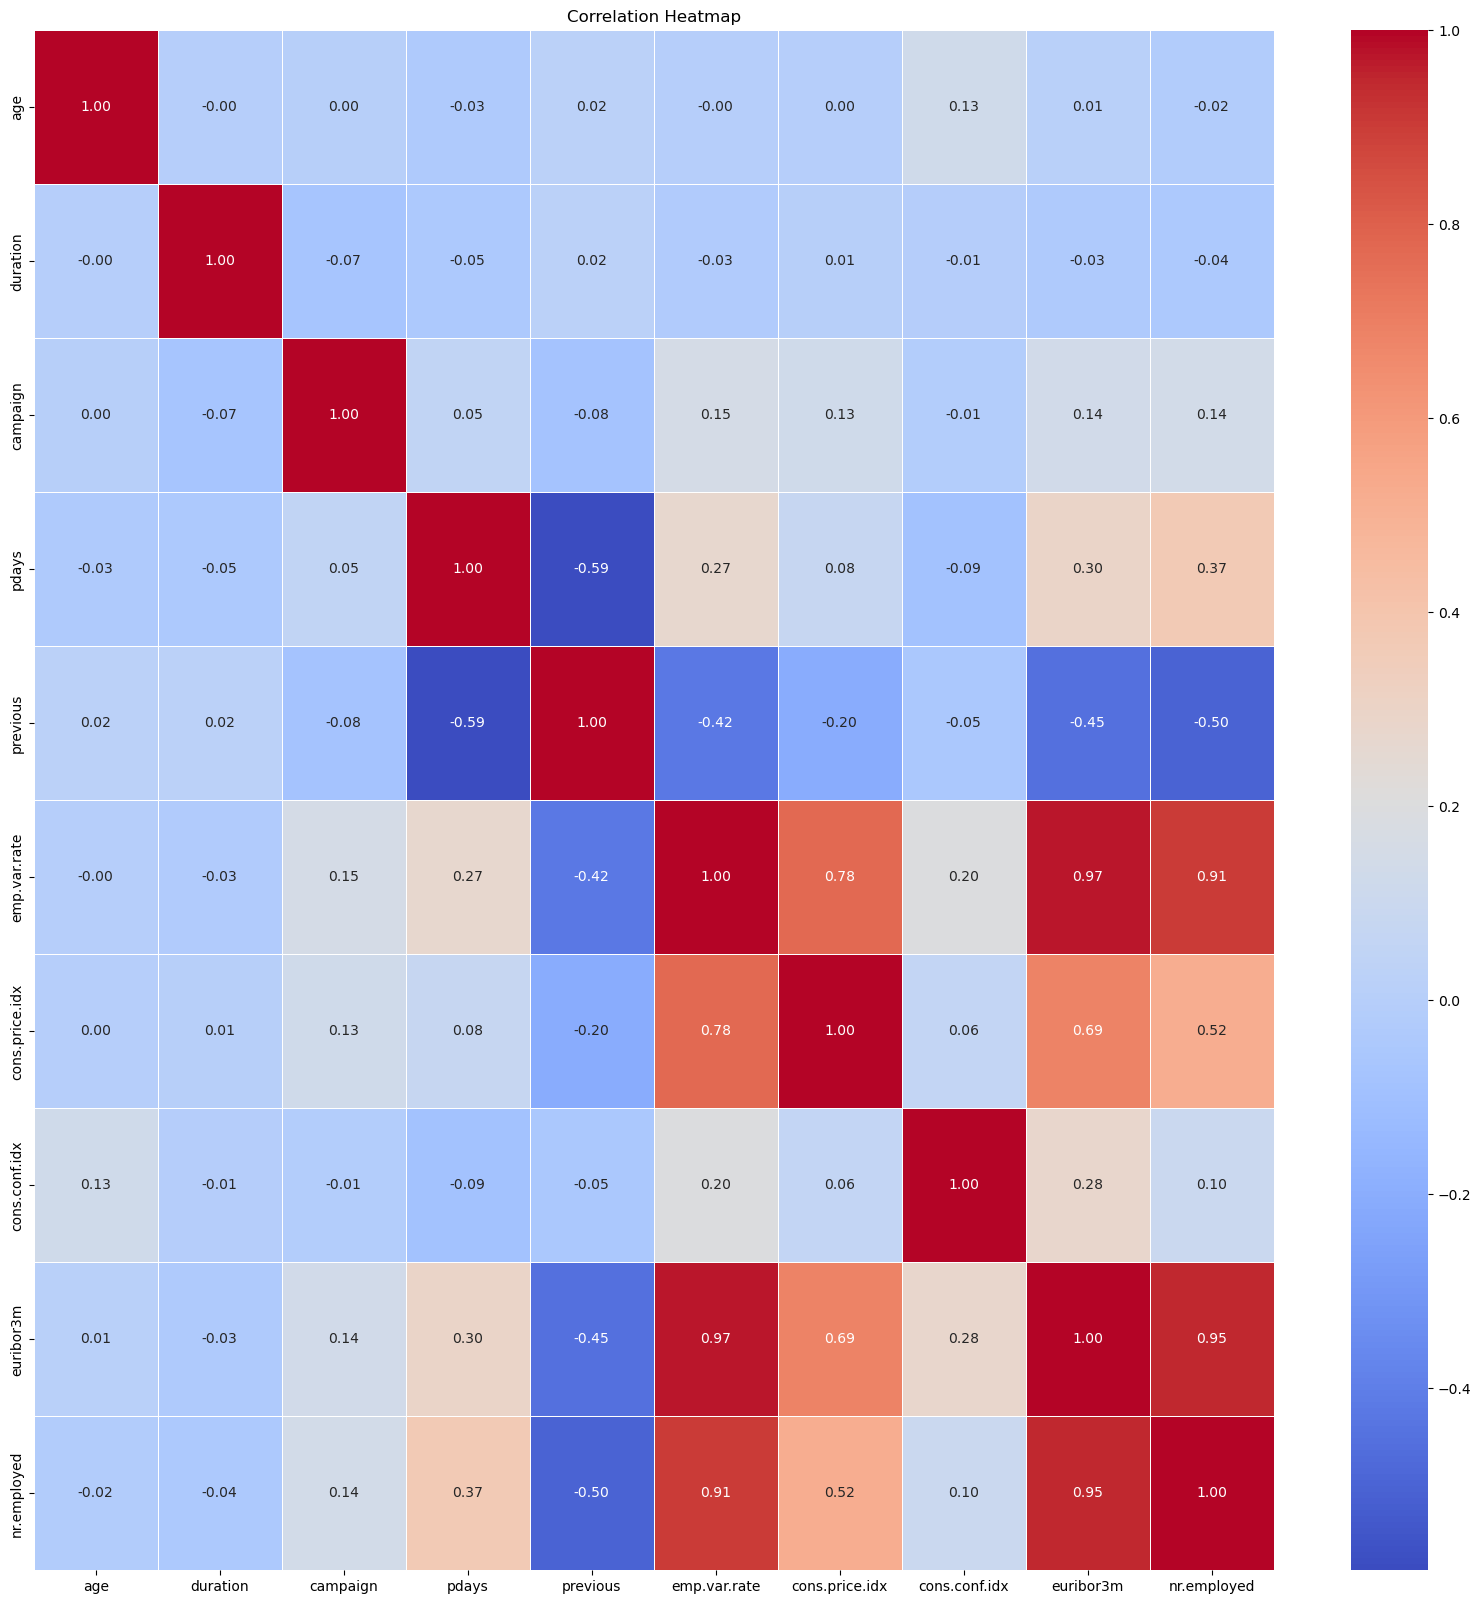

In [12]:
numeric_df=df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

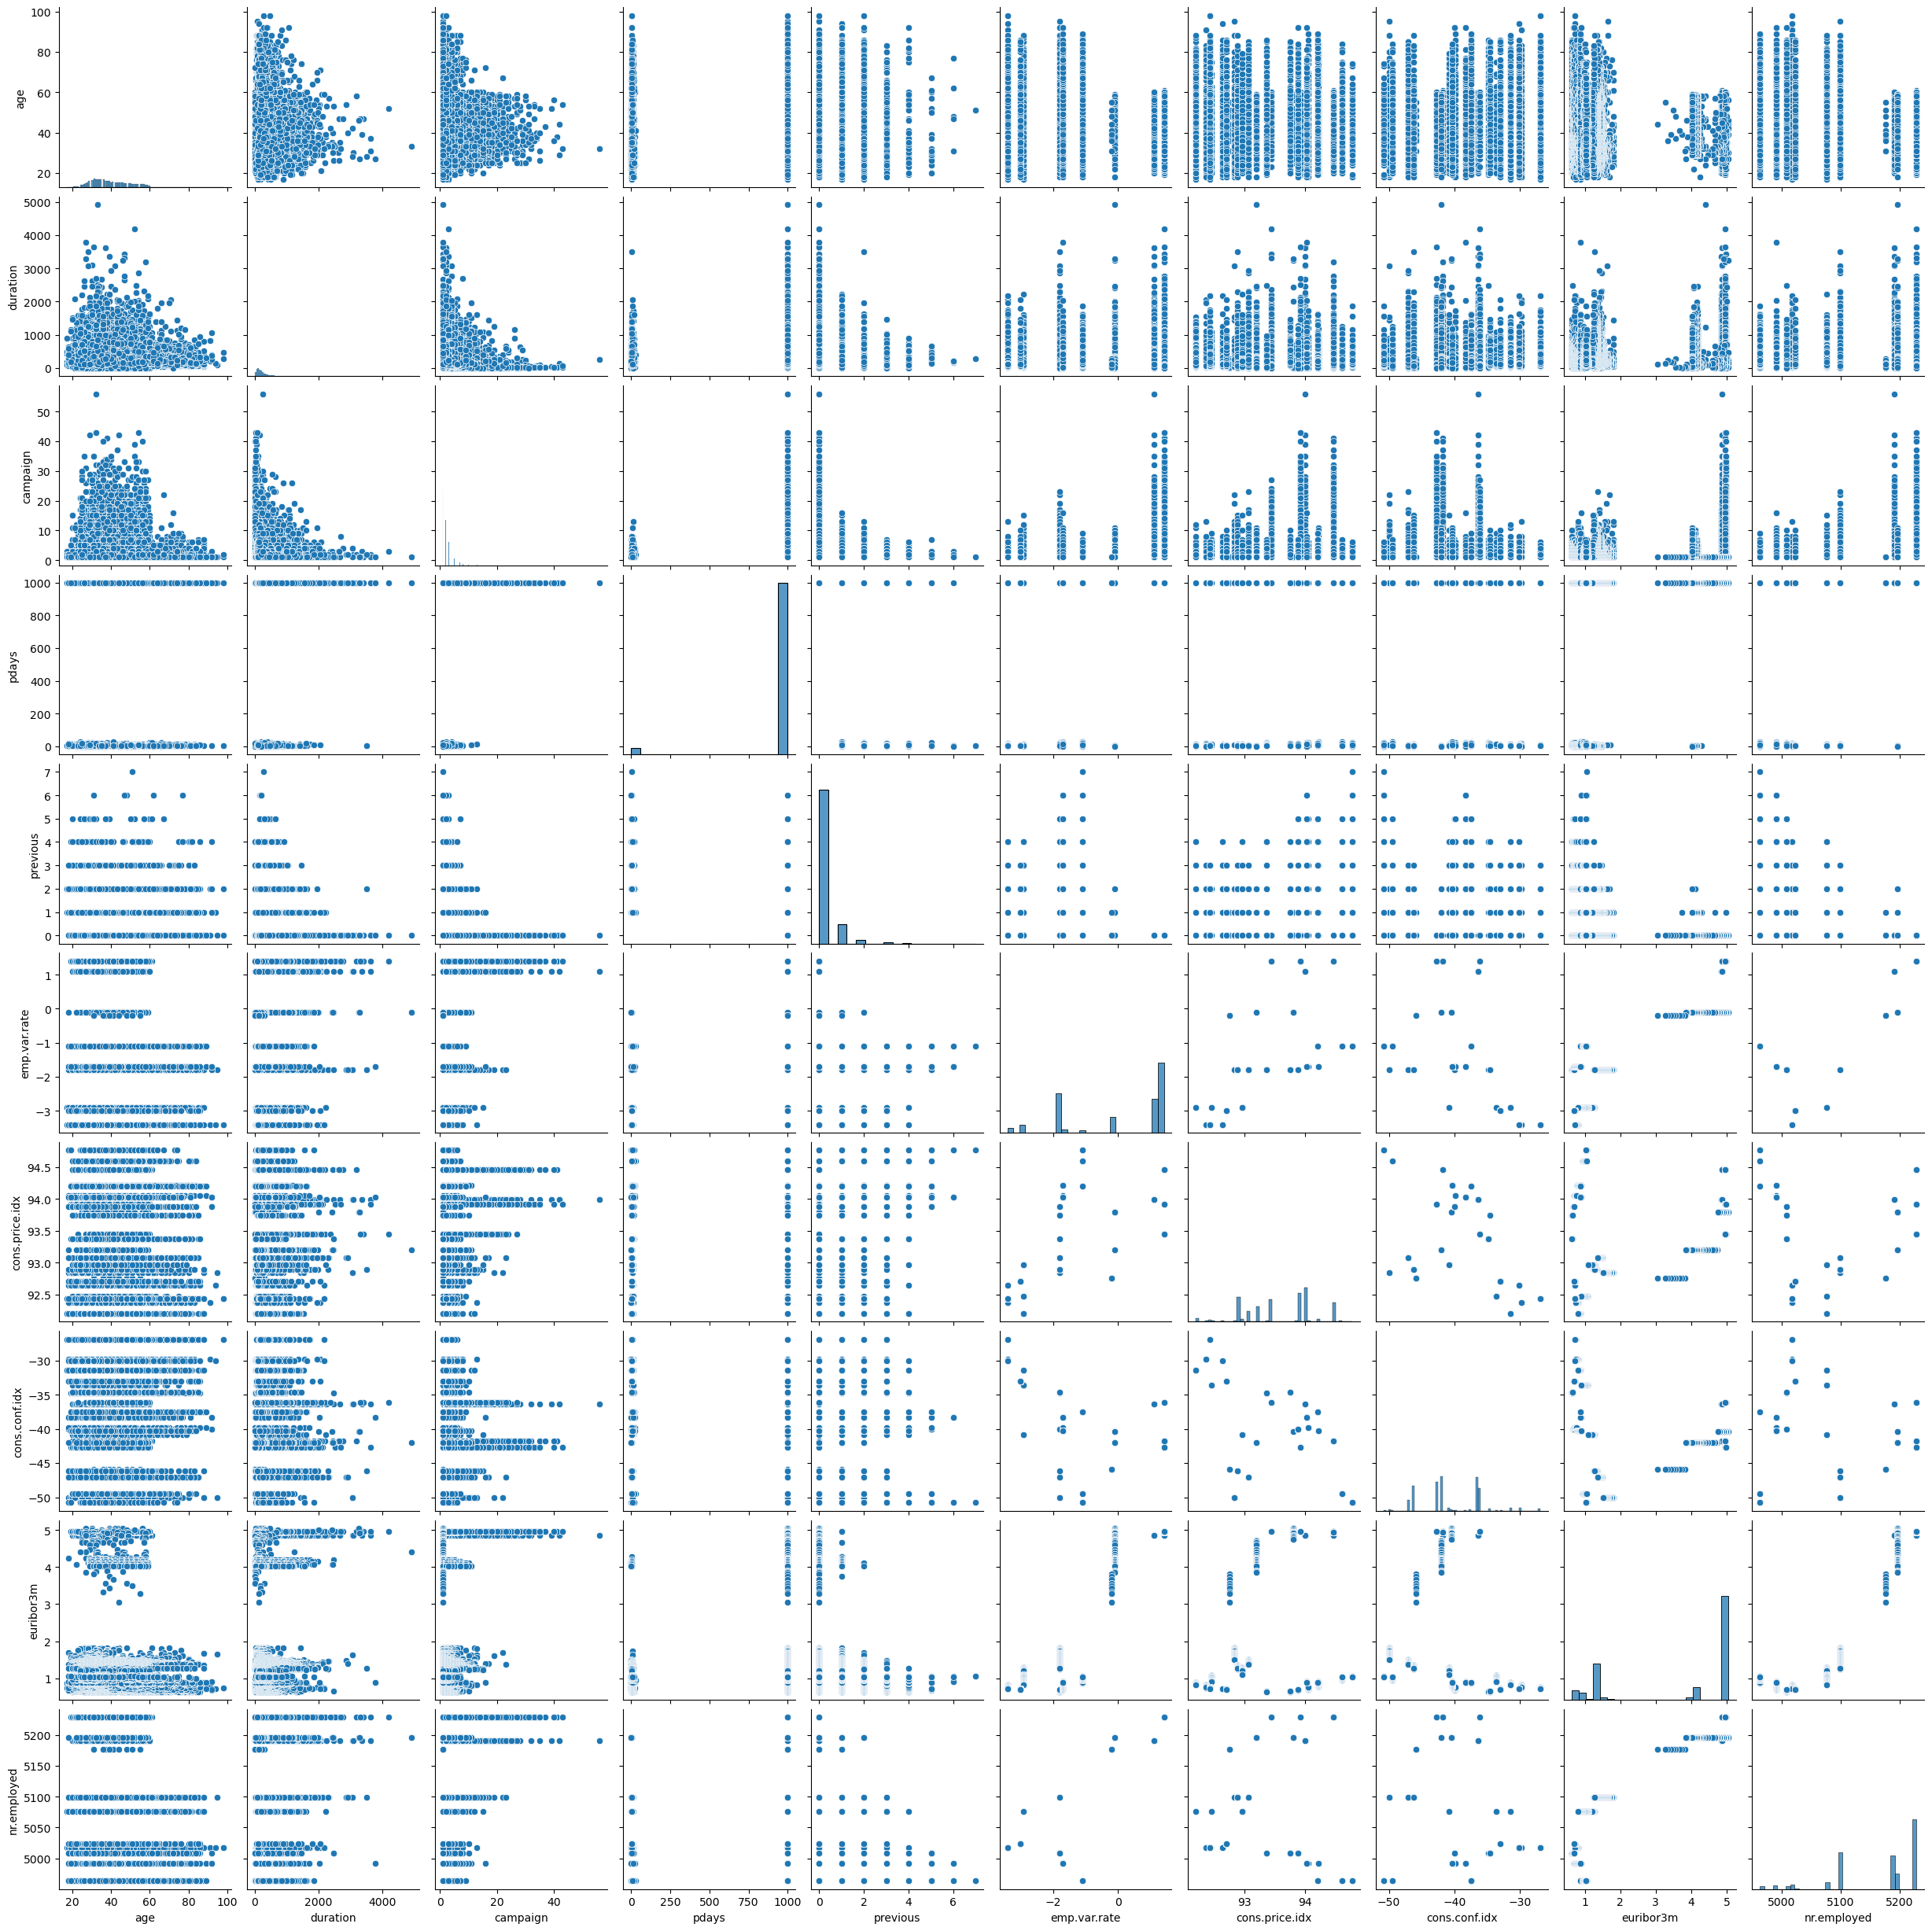

In [13]:
sns.pairplot(df)

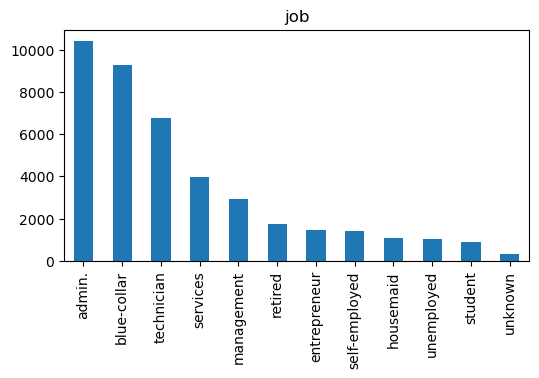

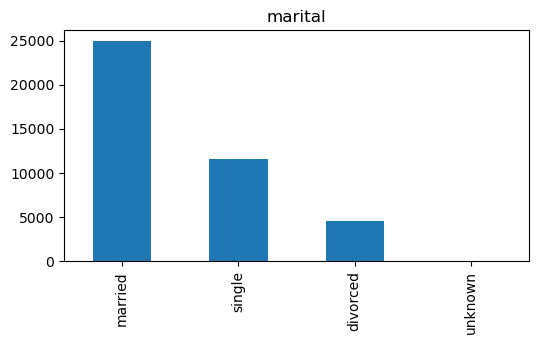

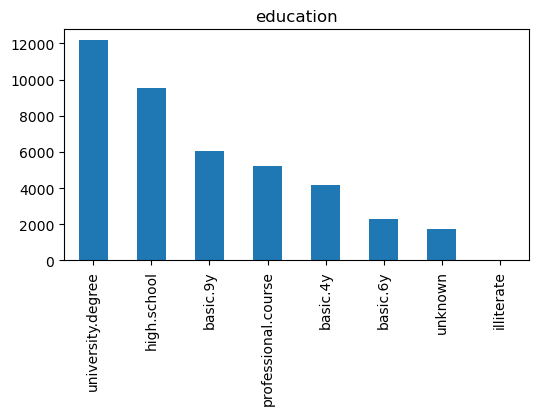

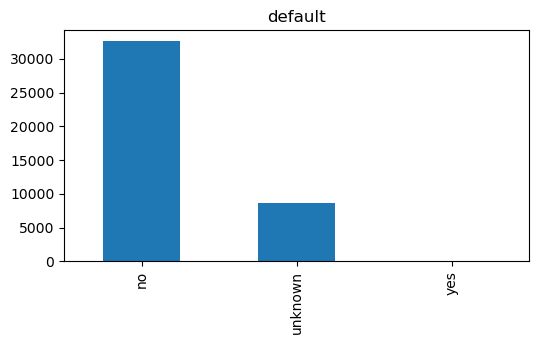

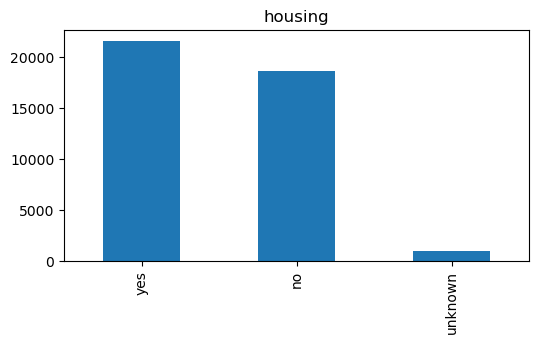

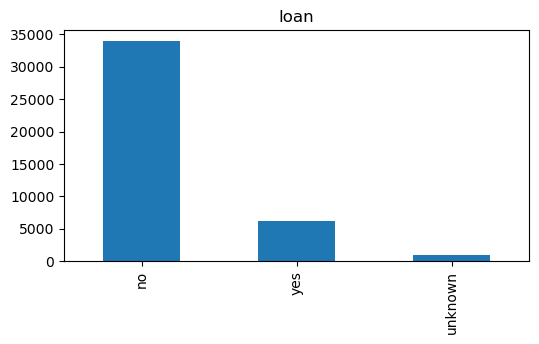

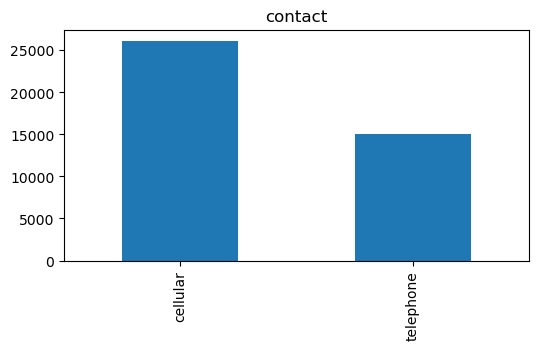

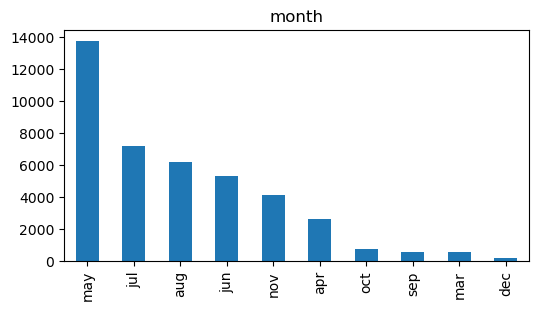

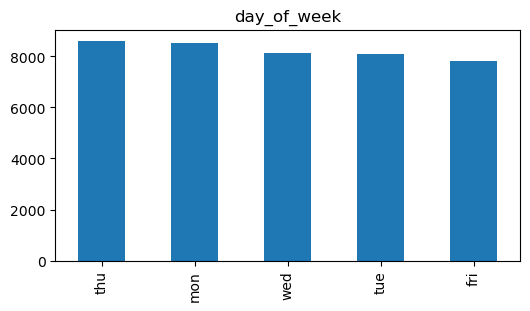

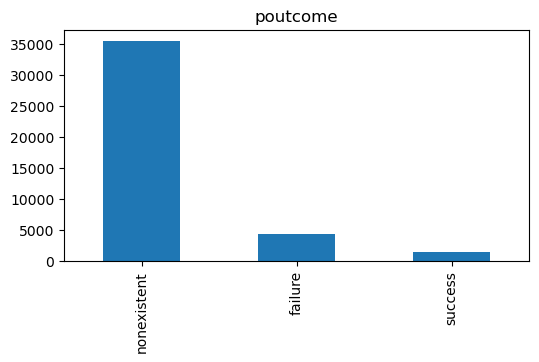

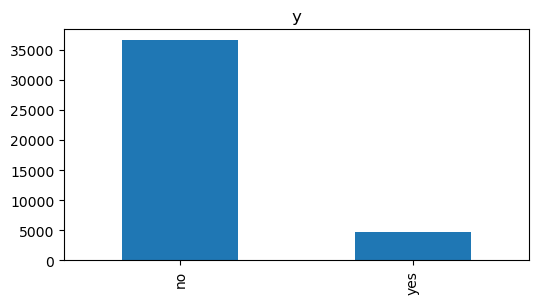

In [14]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

# Plot bar for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

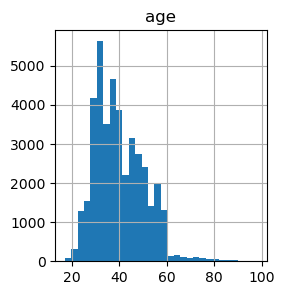

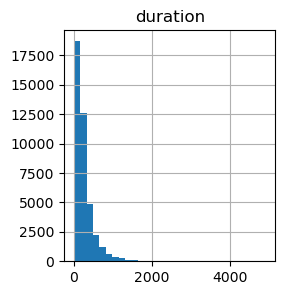

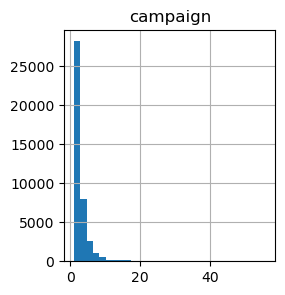

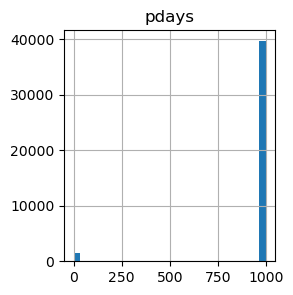

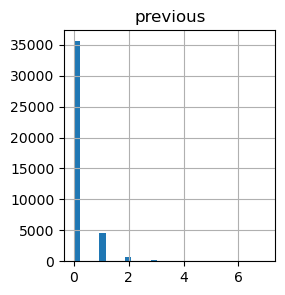

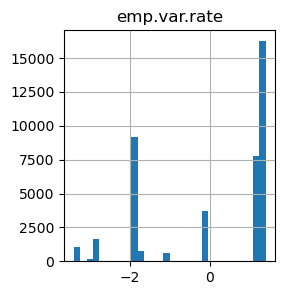

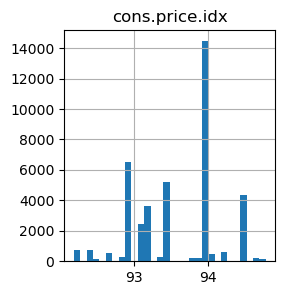

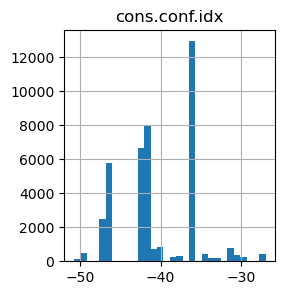

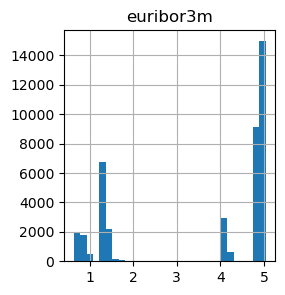

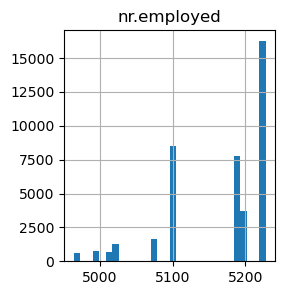

In [15]:
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    
    # Histogram
    plt.subplot(1, 2, 1)
    df[col].hist(bins=30)
    plt.title(col)

# Data Preprocessing

## encoding data

In [16]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
categorical_columns = ["job","marital","default","education","housing","loan","contact","month","day_of_week", "poutcome","y"]
for col in categorical_columns:  
    df[col] = encode.fit_transform(df[col])

# split data

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
x=df.drop(['y'],axis=1)
y=df['y']


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=44)

# Reset indices for both X_train and y_train
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

print("x_train shape :",x_train.shape)
print("y_train shape :",y_train.shape)
print("x_test shape :",x_test.shape)
print("y_test shape :",y_test.shape)

x_train shape : (28831, 20)
y_train shape : (28831,)
x_test shape : (12357, 20)
y_test shape : (12357,)


In [20]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


model=Sequential()
model.add(Dense(256,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5376      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 38401 (150.00 KB)
Trainable params: 38401 (150.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
901/901 [==============================] - 4s 3ms/step - loss: 0.3173 - accuracy: 0.8934 - val_loss: 0.4022 - val_accuracy: 0.8474
Epoch 2/10
901/901 [==============================] - 2s 3ms/step - loss: 0.2675 - accuracy: 0.8966 - val_loss: 0.2340 - val_accuracy: 0.8999
Epoch 3/10
901/901 [==============================] - 2s 3ms/step - loss: 0.2404 - accuracy: 0.9004 - val_loss: 0.2179 - val_accuracy: 0.9029
Epoch 4/10
901/901 [==============================] - 3s 3ms/step - loss: 0.2328 - accuracy: 0.9021 - val_loss: 0.2399 - val_accuracy: 0.8972
Epoch 5/10
901/901 [==============================] - 3s 3ms/step - loss: 0.2245 - accuracy: 0.9028 - val_loss: 0.2165 - val_accuracy: 0.9057
Epoch 6/10
901/901 [==============================] - 3s 4ms/step - loss: 0.2241 - accuracy: 0.9035 - val_loss: 0.2071 - val_accuracy: 0.9014
Epoch 7/10
901/901 [==============================] - 3s 3ms/step - loss: 0.2179 - accuracy: 0.9037 - val_loss: 0.2171 - val_accuracy: 0.9063
Epoch 

In [27]:
import warnings

# Ignore TensorFlow deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="tensorflow")

In [30]:
preds=model.predict(x_test).reshape(-1,)

# convert predictions values into binary predictions (0 , 1)
threshold = 0.5

preds = (preds >= threshold).astype(int)

preds

387/387 [==============================] - 1s 1ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [31]:
preds_series = pd.Series(preds)
counts = preds_series.value_counts()
print(counts)

0    11767
1      590
dtype: int64


In [32]:
result = pd.DataFrame(
    {
        'Actual':y_test.values,
        'Prediction':preds
    }
)
result

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
12352,0,0
12353,0,0
12354,0,0
12355,0,0


In [33]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

387/387 [==============================] - 1s 2ms/step - loss: 0.2285 - accuracy: 0.9024
Test Accuracy: 90.24%


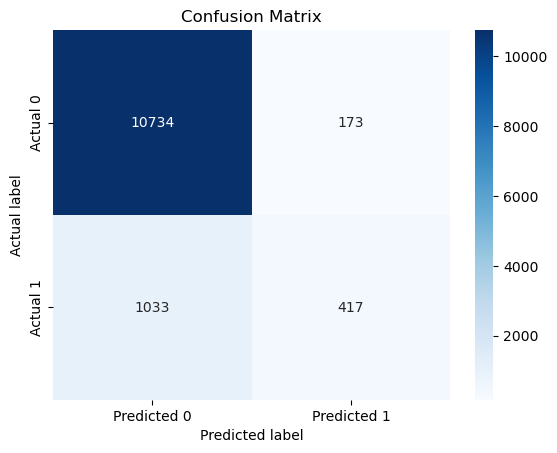

In [34]:
from sklearn.metrics import confusion_matrix

actual_labels = result['Actual']
predicted_labels = result['Prediction']

# Build confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

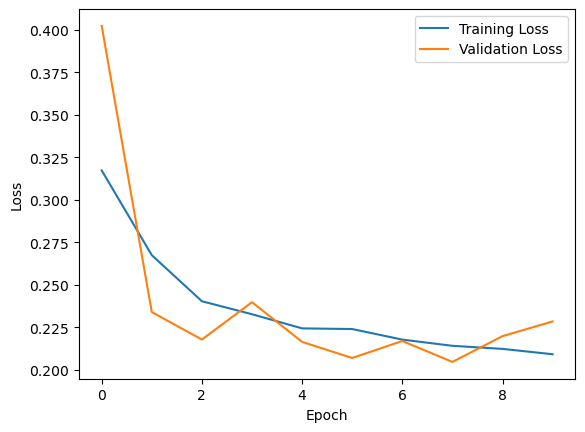

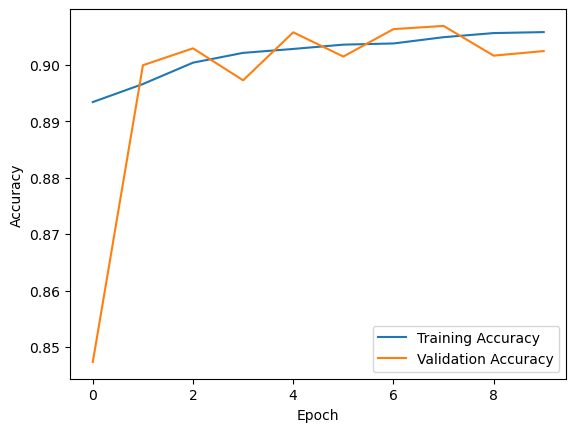

In [35]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [36]:
from sklearn.metrics import classification_report

ClassificationReport = classification_report(y_test,preds)
print("Classification Report:\n", ClassificationReport)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     10907
           1       0.71      0.29      0.41      1450

    accuracy                           0.90     12357
   macro avg       0.81      0.64      0.68     12357
weighted avg       0.89      0.90      0.88     12357

